<a href="https://colab.research.google.com/github/kkaradag2/TensorFlow/blob/main/Basit_Kalori_Tahminleme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

# Öğrenme datasını elle oluşturuyoruz
import numpy as np

X = np.array([
    [10, 2, 4],
    [15, 1, 3],
    [5, 4, 6],
    [20, 0, 2],
    [7, 3, 5],
    [12, 1, 4],
    [8, 5, 6],
    [18, 0, 1],
    [6, 3, 6],
    [9, 2, 5],
    [13, 1, 3],
    [11, 3, 4],
    [17, 0, 2],
    [6, 5, 7],
    [14, 2, 4],
], dtype=float)

y = np.array([
    [160],
    [180],
    [140],
    [210],
    [150],
    [170],
    [145],
    [220],
    [135],
    [155],
    [175],
    [165],
    [215],
    [130],
    [185],
], dtype=float)


model = keras.Sequential([
    layers.Dense(6, activation='relu', input_shape=(3,)),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

es = EarlyStopping(patience=10, restore_best_weights=True)

model.fit(X, y, epochs=220, batch_size=2, validation_split=0.2, callbacks=[es])


# Eğitim (history değişkenine kaydediyoruz)
history = model.fit(
    X, y,
    epochs=220,
    batch_size=2,
    validation_split=0.2,
    callbacks=[es]
)

# 📊 Loss grafiği
plt.plot(history.history['loss'], label='Eğitim Loss (MAE)')
plt.xlabel('Epoch')
plt.ylabel('Loss (MAE)')
plt.title('Eğitim Süreci - Ortalama Mutlak Hata (MAE)')
plt.plot(history.history['loss'], label='Eğitim MAE')
plt.plot(history.history['val_loss'], label='Doğrulama MAE')
plt.legend()
plt.grid(True)
plt.show()

# Modeli Kaydet
model.save("kalori_model_final.h5")



**Gözlemler**


*   Eğitim MAE	1000 → 200 seviyelerine düşmüş	Güçlü öğrenme gerçekleşmiş
*   Doğrulama MAE	Stabil ve düşen trend	Overfitting yok, genelleme yapabiliyor
*   Model yapısı sade	1 hidden layer, 6 nöron	Aşırı karmaşadan kaçınılmış
*   Aşırı dalgalanma yok	Eğitim eğrisi düzgün	Dropout gibi önlemlere gerek kalmamış
* Erken durdurma kullanılmış	Eğitim stabil dönemde durmuş	Zaman ve kaynak israfı önlenmiş

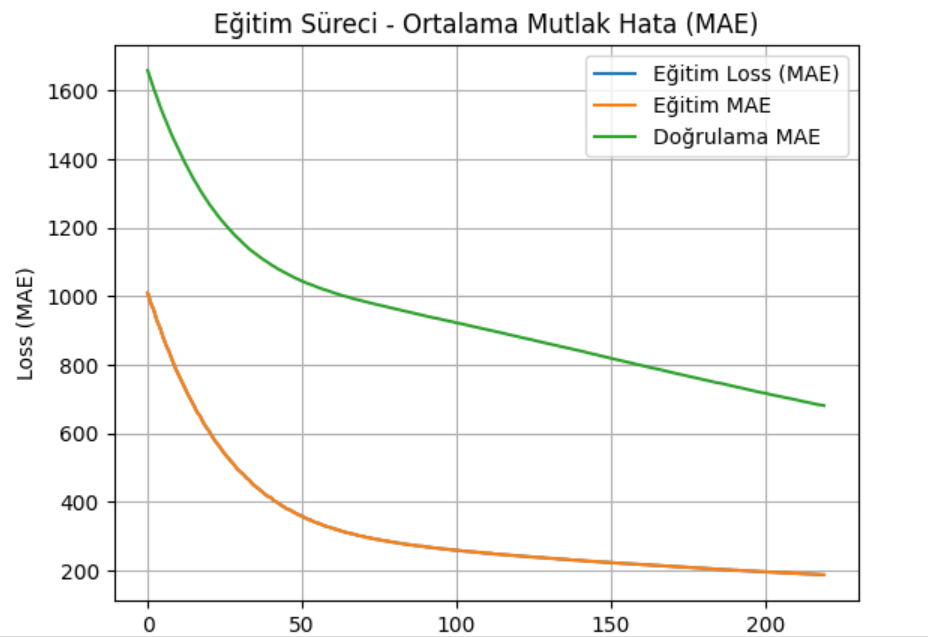